**Table of contents**<a id='toc0_'></a>    
- [Introduction](#toc1_)    
  - [Objective](#toc1_1_)    
- [Description](#toc2_)    
  - [Conclution](#toc2_1_)    
- [EDA](#toc3_)    
- [Creation of ML model](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Introduction](#toc0_)
This dataset provides insights into factors influencing hiring decisions. Each record represents a candidate with various attributes considered during the hiring process. 

The data and description was obteined from __[Kaggle](https://www.kaggle.com/datasets/rabieelkharoua/predicting-hiring-decisions-in-recruitment-data/data)__

## <a id='toc1_1_'></a>[Objective](#toc0_)
The goal is to predict whether a candidate will be hired based on these attributes.

# <a id='toc2_'></a>[Description](#toc0_)

In [166]:
# libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [167]:
# Setting background chart
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [168]:
# Read csv
df = pd.read_csv("https://raw.githubusercontent.com/jFcomb/hiring_prediction/main/dataset/recruitment_data.csv")

# Visualizing some data
df.sample(10)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
14,43,1,2,3,3,35.019221,23,22,98,1,0
1023,22,0,2,12,3,27.044109,39,20,96,2,0
101,21,1,2,9,3,28.375894,81,82,53,1,1
1234,26,0,4,11,4,4.520268,55,28,33,2,0
757,31,1,4,15,2,45.352137,83,61,65,2,1
574,39,0,3,13,1,12.150491,97,61,48,2,1
1493,43,1,2,14,4,25.620088,42,36,55,1,0
1321,21,1,2,5,3,18.109320,49,93,2,2,0
1015,42,1,3,13,3,14.311575,55,85,82,1,1
598,40,0,1,13,4,47.573950,70,59,22,2,0


In [169]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [170]:
# Checking duplicate data
print('Data duplicated: ', df.duplicated().sum())

Data duplicated:  0


In [171]:
# Data describe
df.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


## <a id='toc2_1_'></a>[Conclution](#toc0_)

We have a small dataset with 1,500 rows and 11 colums whit the following description: 

Variables Description

* ``Age``: Age of the candidate range from 20 to 50 
* ``Gender``: Gender of the candidate Male (0) or Female (1).
* ``EducationLevel``: Highest level of education attained by the candidate. Cataloged as:
    1. : Bachelor's (Type 1)
    2. : Bachelor's (Type 2)
    3. : Master's
    4. : PhD
* ``ExperienceYears``: Number of years of professional experience. Range from 0 to 15 years.
* ``PreviousCompanies``:Number of previous companies where the candidate has worked. Range From 1 to 5 companies.
* ``DistanceFromCompany``:Distance in kilometers from the candidate's residence to the hiring company. Range from 1 to 50 kilometers.
* ``InterviewScore``: Score achieved by the candidate in the interview process. Range from 0 to 100.
* ``SkillScore``: Assessment score of the candidate's technical skills. Range from 0 to 100.
* ``Personality`` Score: Evaluation score of the candidate's personality traits. Range from 0 to 100.
* ``Recruitment`` Strategy: Strategy adopted by the hiring team for recruitment. Cataloged as:
    1. Aggressive
    2. Moderate
    3. Conservative
* ``HiringDecision``: Outcome of the hiring decision(Our Target variable). Cataloged as:
    * 0: Not hired
    * 1: Hired

We don't have any null or duplicated data, and all data types are correct. The only change I will make is to convert the column names to lowercase for easier typing.

In [172]:
# Converting columns to lowercase
df.columns = df.columns.str.lower()
print(df.columns)

Index(['age', 'gender', 'educationlevel', 'experienceyears',
       'previouscompanies', 'distancefromcompany', 'interviewscore',
       'skillscore', 'personalityscore', 'recruitmentstrategy',
       'hiringdecision'],
      dtype='object')


In [173]:
df['isp_mean']= df[['interviewscore','skillscore','personalityscore']].sum(axis=1)/3

df

,age,gender,educationlevel,experienceyears,previouscompanies,distancefromcompany,interviewscore,skillscore,personalityscore,recruitmentstrategy,hiringdecision,isp_mean
0,26,1,2,0,3,26.783828,48,78,91,1,1,72.333333
1,39,1,4,12,3,25.862694,35,68,80,2,1,61.000000
2,48,0,2,3,2,9.920805,20,67,13,2,0,33.333333
3,34,1,2,5,2,6.407751,36,27,70,3,0,44.333333
4,30,0,1,6,1,43.105343,23,52,85,2,0,53.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,1,49.666667
1496,27,1,2,10,3,14.847731,43,97,7,2,0,49.000000
1497,24,1,1,1,2,4.289911,31,91,58,1,1,60.000000
1498,48,0,2,4,4,36.299263,9,37,44,2,1,30.000000


# <a id='toc3_'></a>[EDA](#toc0_)

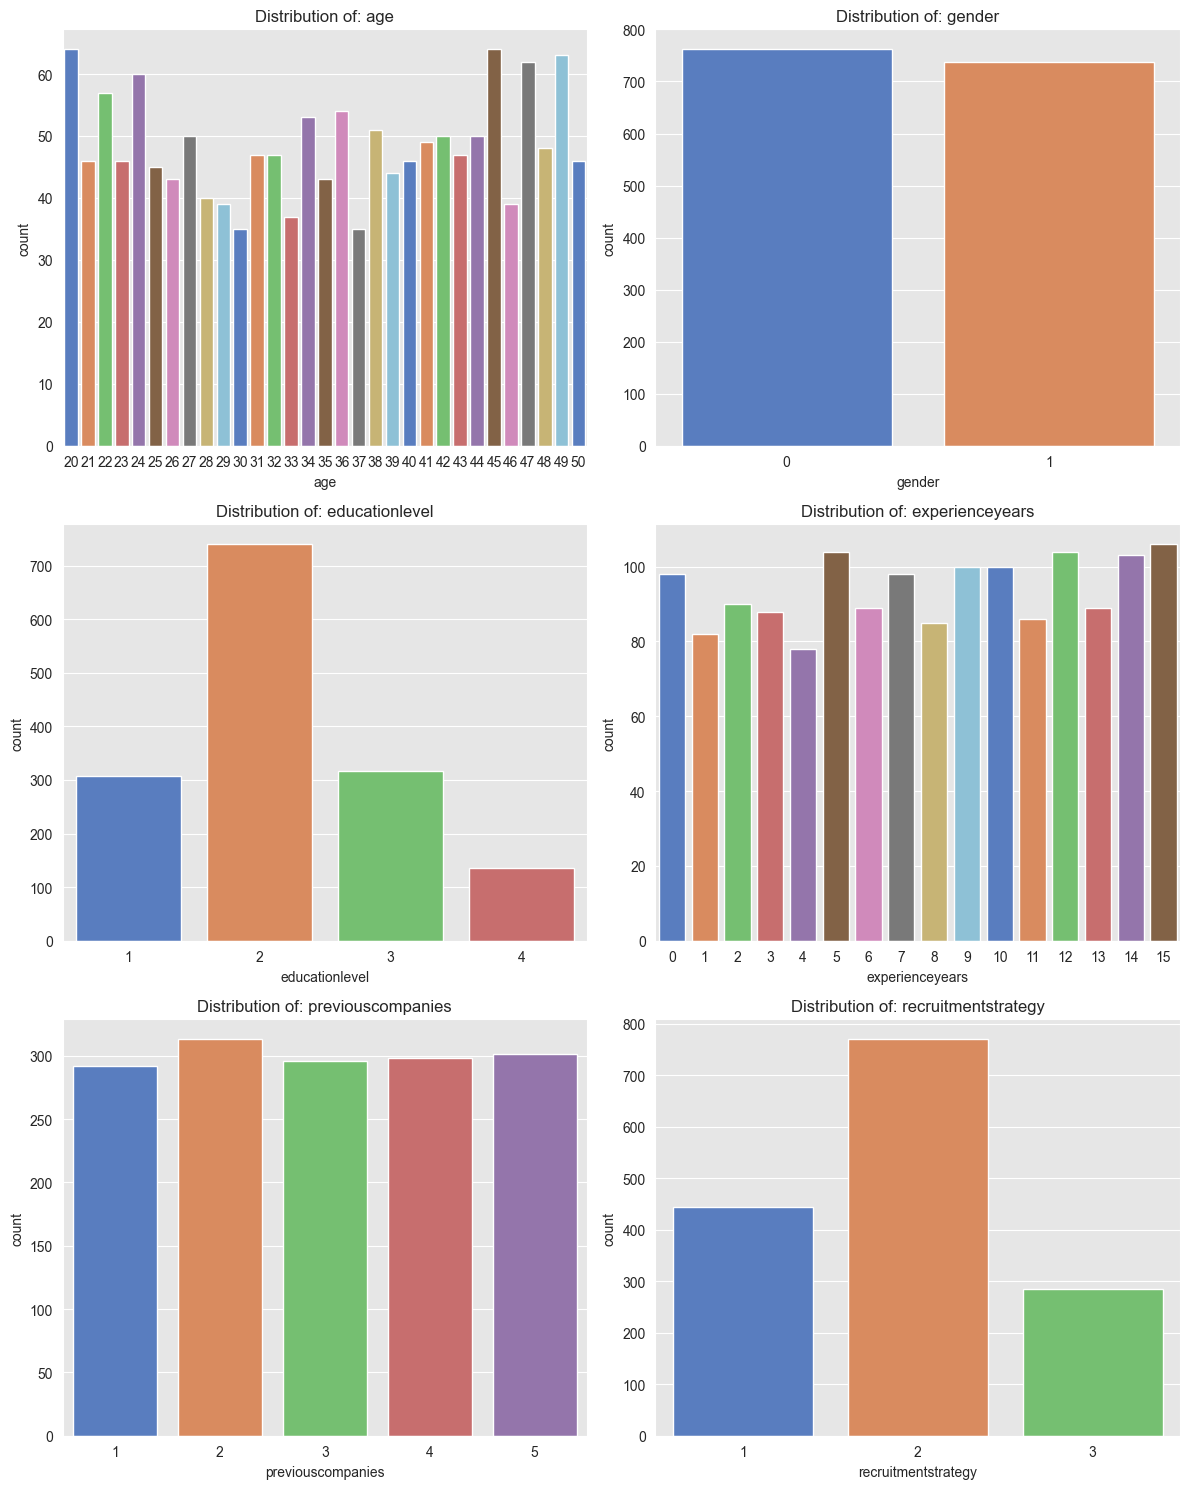

In [174]:
# Plotting numeric varaibles
count_colums=['age','gender','educationlevel','experienceyears','previouscompanies','recruitmentstrategy']

plt.figure(figsize=(12,15))
for i, column in enumerate(count_colums,1):
    plt.subplot(3,2,i)
    ax=sns.countplot(df,x=column, hue=column, legend=False, palette='muted')
    plt.title(f'Distribution of: {column}')
        
plt.tight_layout()
plt.show()

From this plots we can see:

* **age**: There is a high demand for jobs among people in their 20s, as well as those who are 45, 47, and 49 years old.
* **gender**: There are more men than women in our dataset, but the values are almost the same, so there is not a big difference.
* **educationlevel**: There are more people with a Bachelor's degree (Type 2 level) and fewer people with a PhD.
* **expirienceyear**: The people with the most applications have 5, 12, and 15 years of experience, whereas those with the fewest applications have 4 years of experience.
* **previoscompanies**: There is a difference of 21 between the first place and the last place, so it is not a big difference.
* **recuitmentstrategy**: The most people use the strategy number 2.


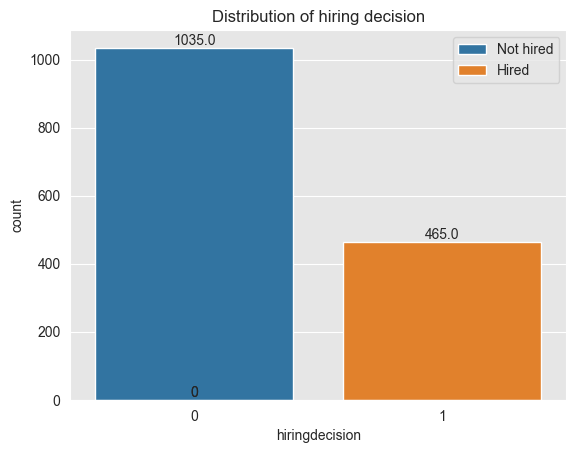

In [175]:
# Plotting target
ax = sns.countplot(df, x='hiringdecision', hue= 'hiringdecision', legend = True)
plt.legend(['Not hired', 'Hired']) # Change names in legend

# drawing counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Distribution of hiring decision') 
plt.show()

We have more dicision about not hiring than hiring, thus our target is unbalanced. 

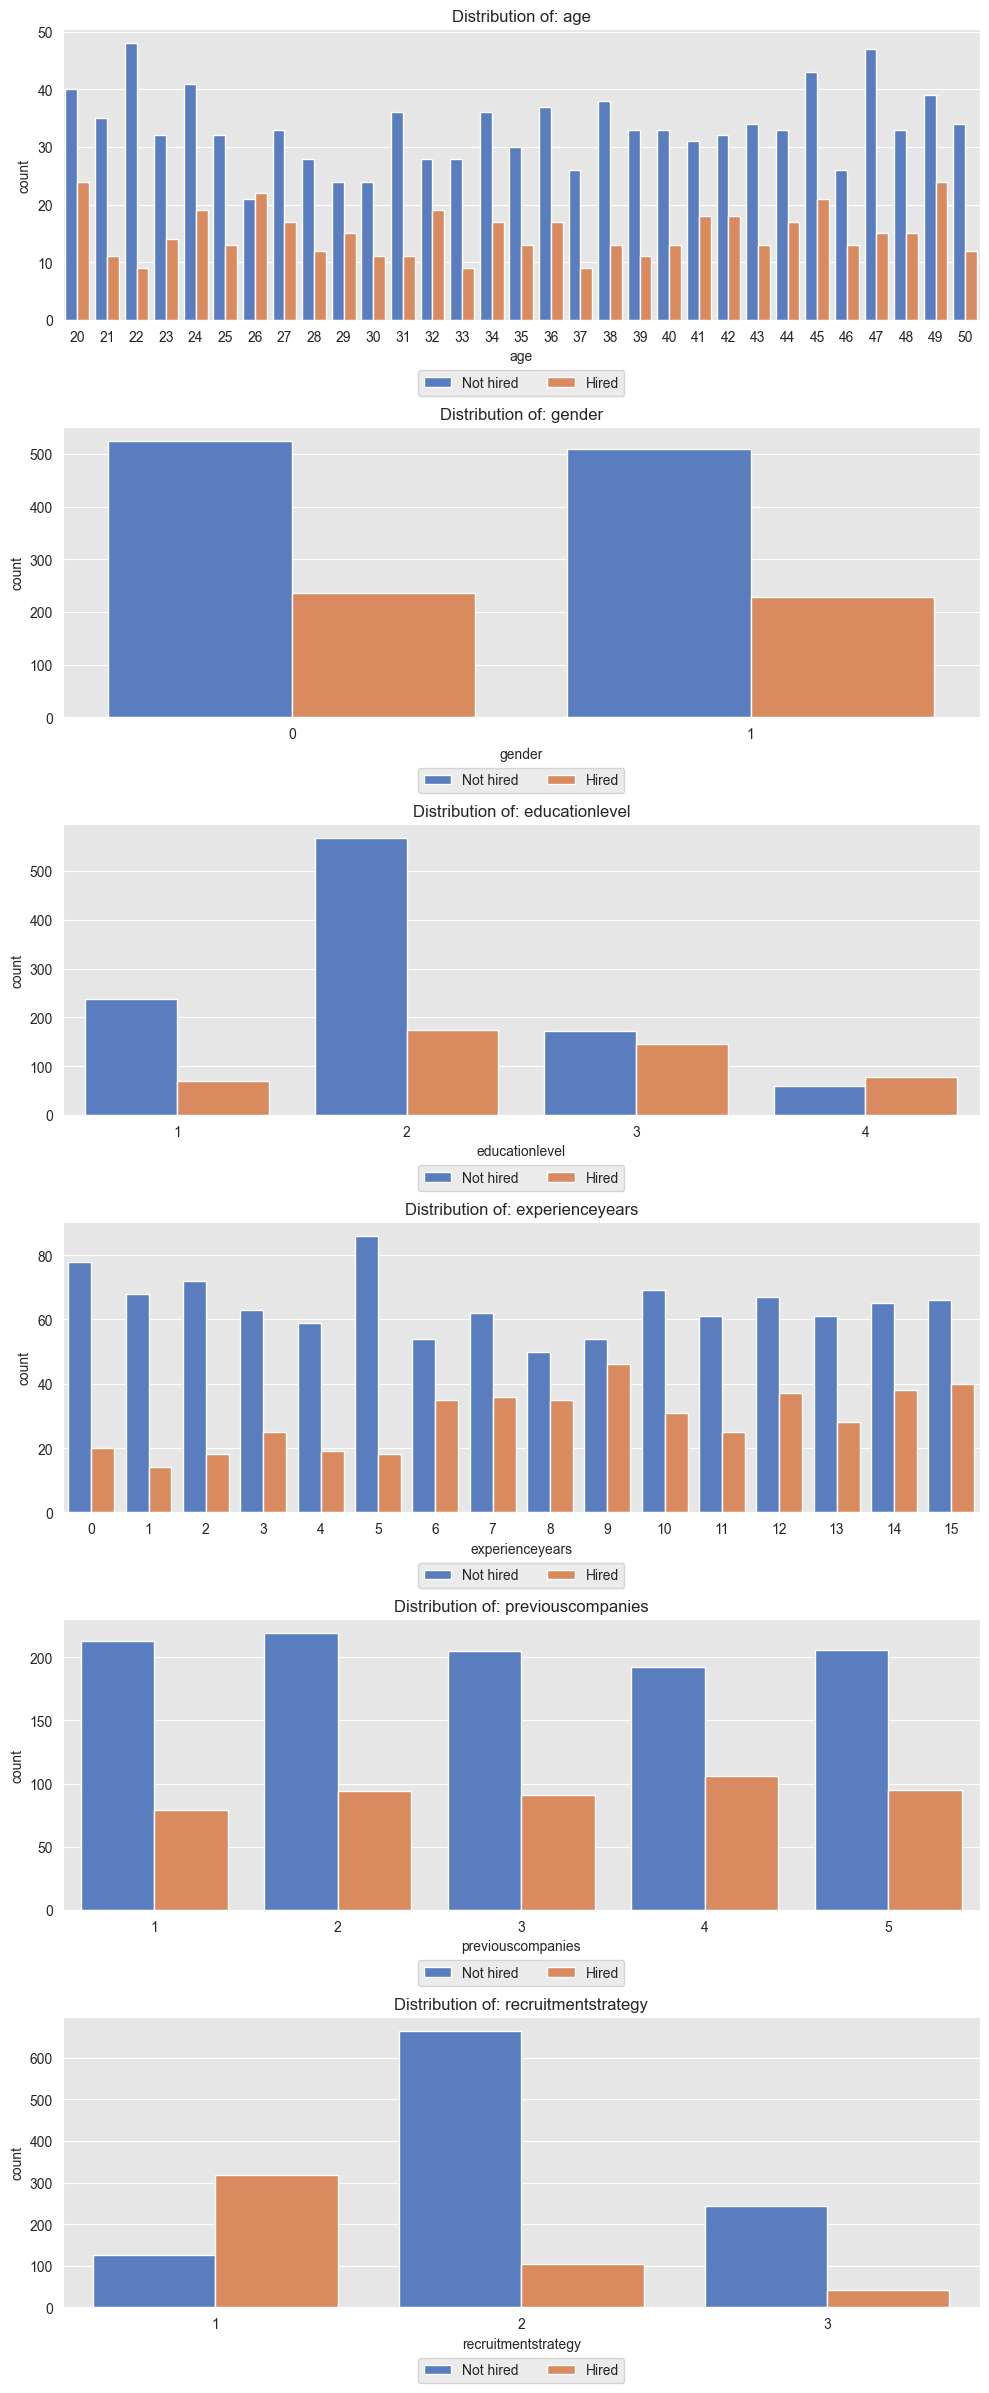

In [176]:
# Plotting numeric varaibles vs hired or not hired

plt.figure(figsize=(10,24))
for i, column in enumerate(count_colums,1):
    plt.subplot(6,1,i)
    ax=sns.countplot(df, x= column, hue='hiringdecision', palette='muted')
    plt.title(f'Distribution of: {column}')
    plt.legend(['Not hired', 'Hired'], bbox_to_anchor=(0.5,-0.15), ncol=2, fancybox=True, loc='upper center')
    
plt.tight_layout()
plt.show()
    

* **age**: We have more hires at the ages of 20 and 49, while at the age of 22, we have more non-hires, resulting in fewer hires. And at the age of 26, we have more hires than non-hires 
* **gender**: The difference according to gender is minimal; the values are almost the same.
* **educationlevel**: We can see that Levels 3 and 4 have a more balanced distribution between hired and not hired decisions. In fact, Level 4 has a slightly higher number of hired decisions
* **expirienceyear**: There is a more balanced distribution between hired and not hired decisions with 9 years of experience. On the other hand, with 5 years of experience, the difference increases significantly.
* **previoscompanies**: There is a slightly higher probability of being hired with experience at 4 previous companies.
* **recuitmentstrategy**: Although strategy number 2 is commonly used, we can see that strategy number 1 is the most effective

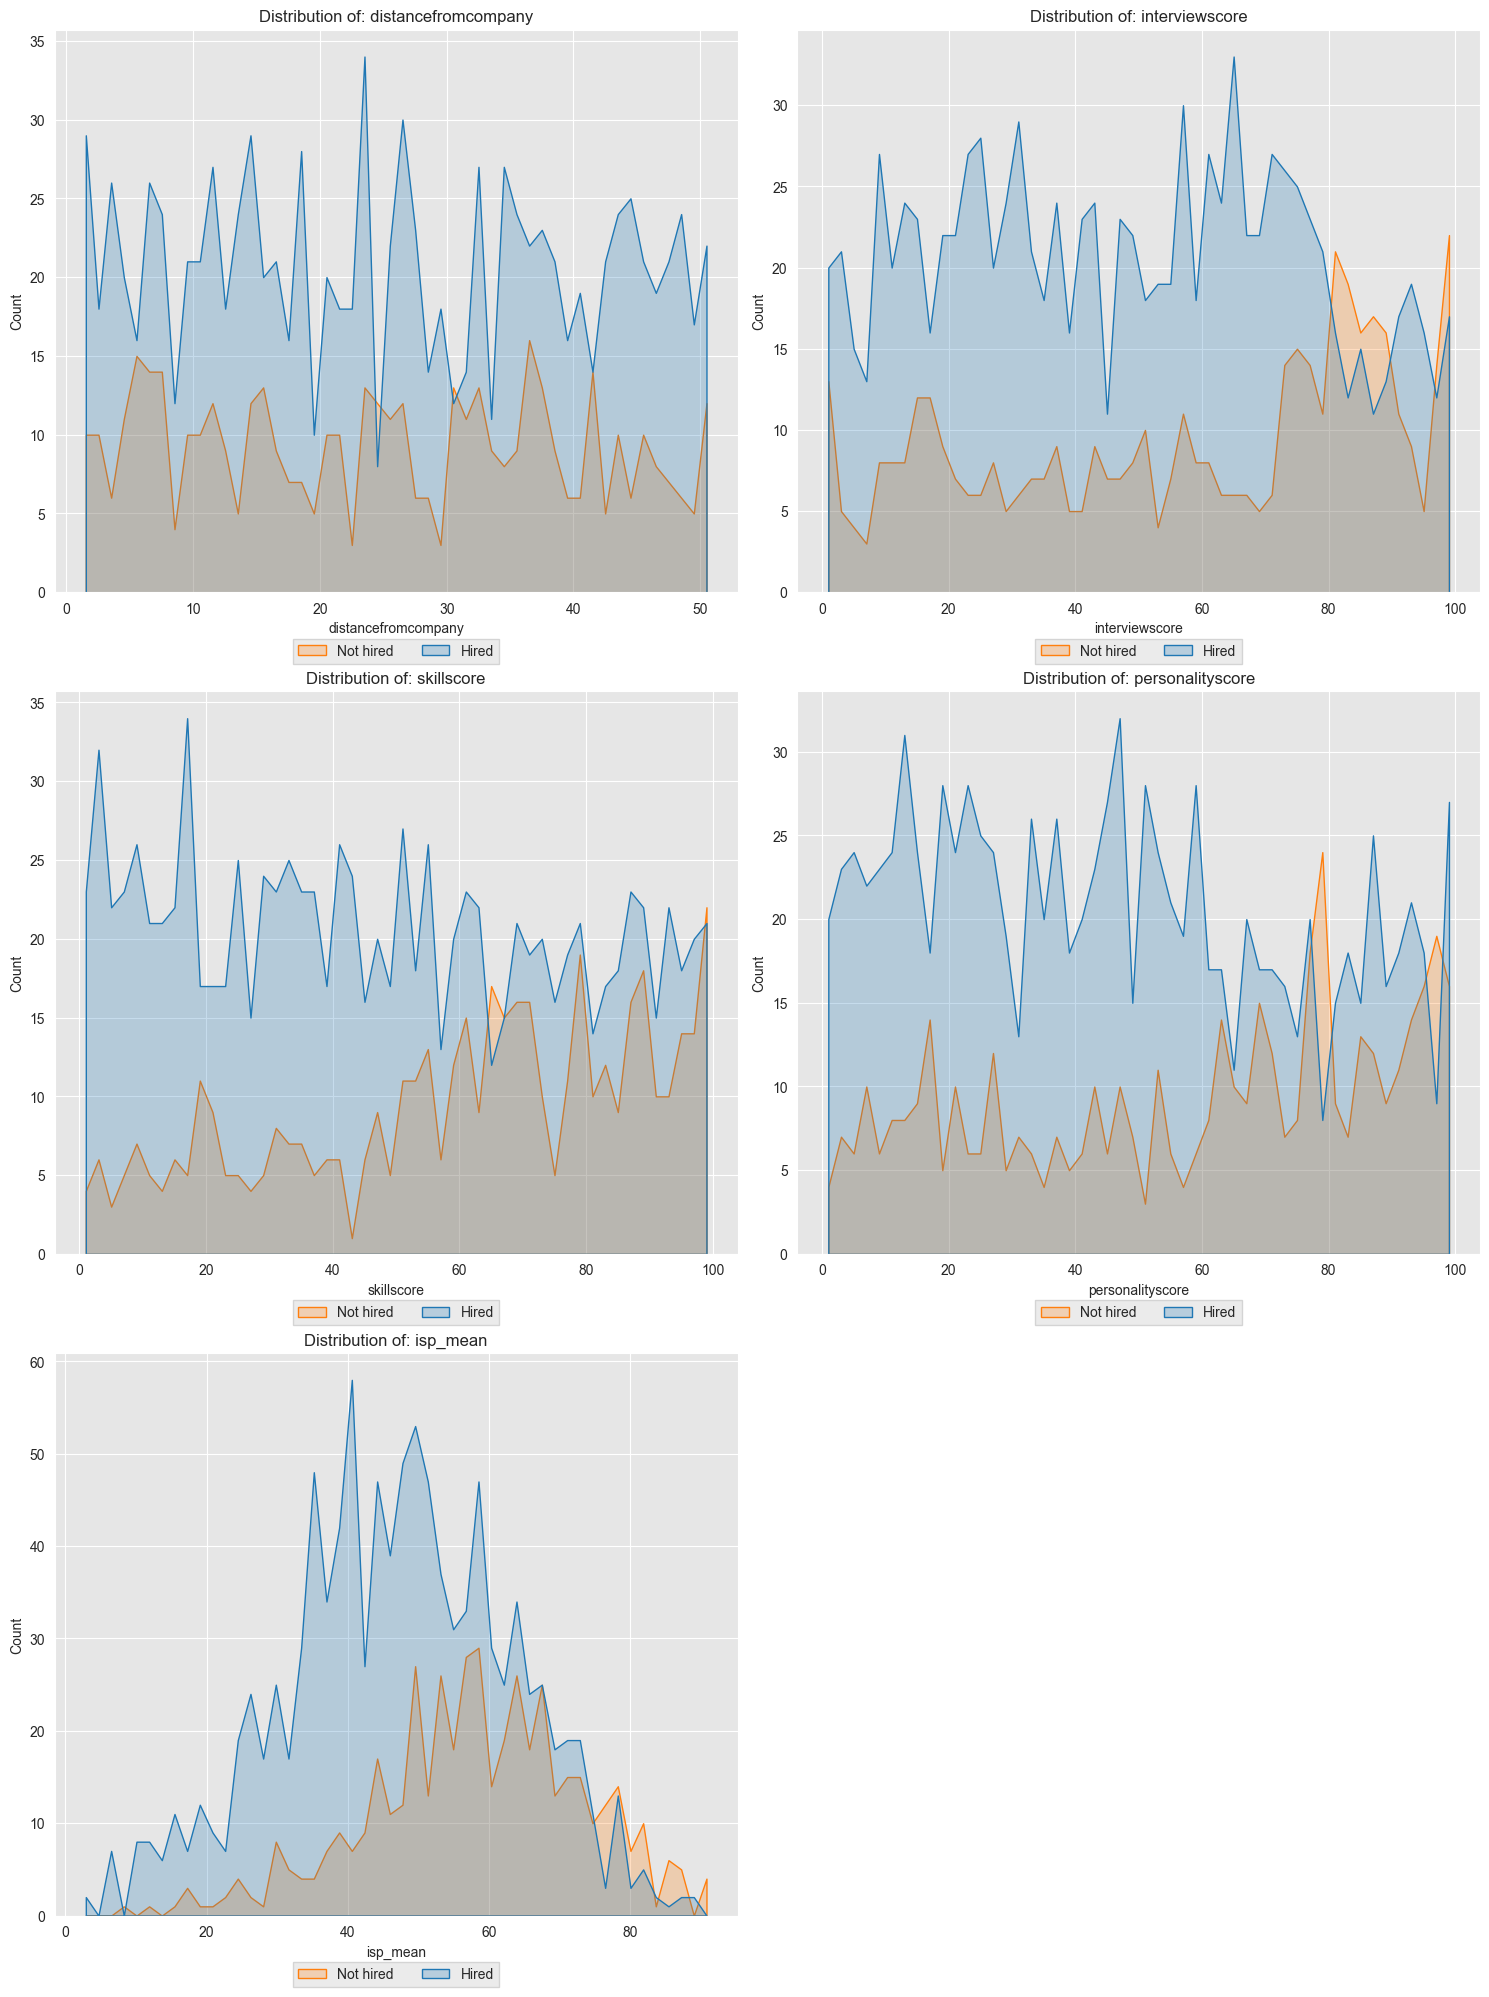

In [177]:
# Plotting numeric varaibles
numerical_features = df.columns.drop(count_colums)
numerical_features = numerical_features.drop('hiringdecision')

plt.figure(figsize=(15,20))
for i, column in enumerate(numerical_features,1):
    plt.subplot(3,2,i)
    ax=sns.histplot(df, x= column, hue= 'hiringdecision', bins=50, element='poly')
    plt.title(f'Distribution of: {column}')
    plt.legend(['Not hired', 'Hired'], bbox_to_anchor=(0.5,-0.07), ncol=2, fancybox=False, loc='upper center')    

plt.tight_layout()
plt.show()

We can highlight that a good balance in distance from the company is around 24-25 km, and scores higher than 80 have a greater probability of success. Additionally, if we take the mean of the three tests, a good score is any that is approximately higher than 78.

# <a id='toc4_'></a>[Creation of ML model](#toc0_)

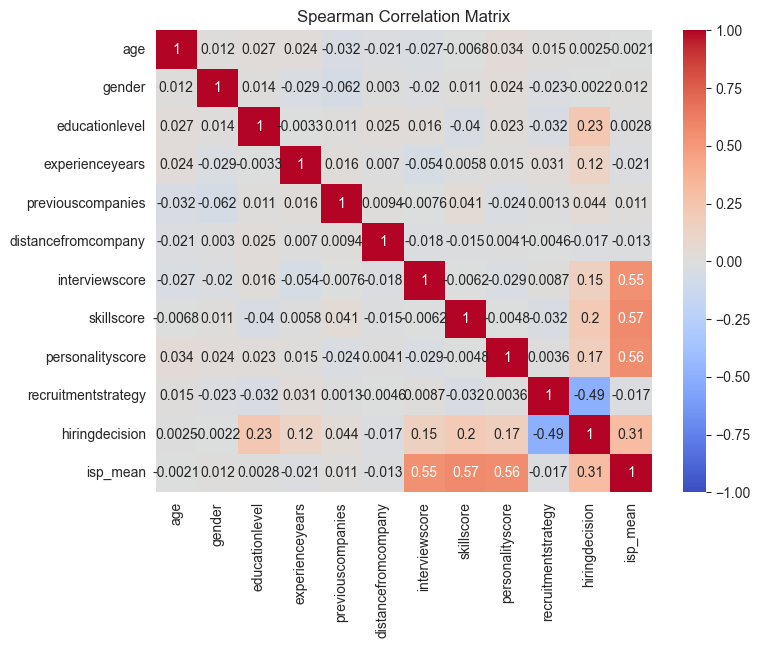

In [178]:
# Correlation matrix
spearman_corr = df.corr(method='spearman')

# Visualizar la matriz de correlación con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Spearman Correlation Matrix')
plt.show()

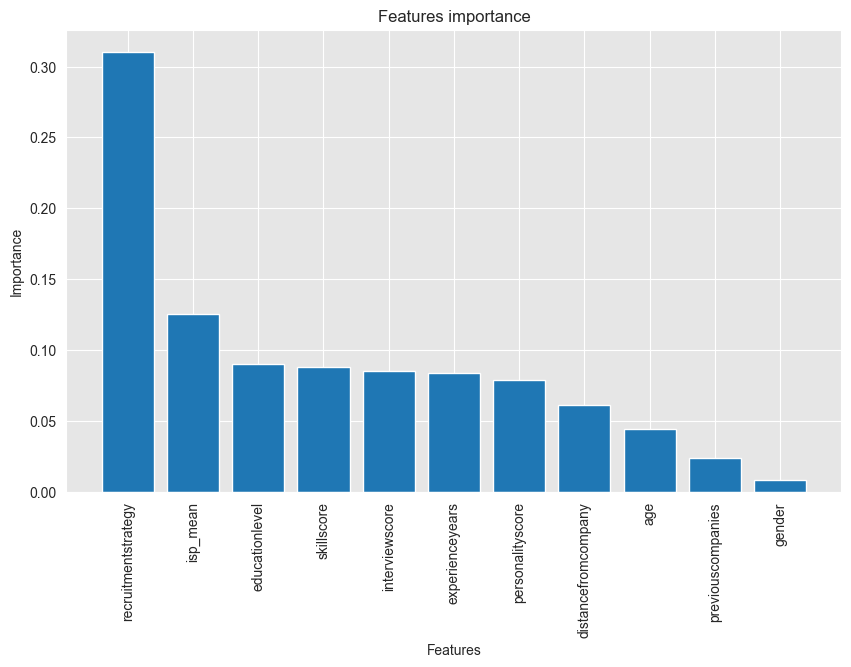

recruitmentstrategy: 0.3103
isp_mean: 0.1252
educationlevel: 0.0902
skillscore: 0.0882
interviewscore: 0.0849
experienceyears: 0.0841
personalityscore: 0.0788
distancefromcompany: 0.0613
age: 0.0443
previouscompanies: 0.0240
gender: 0.0087


In [179]:
# Features and target
features = df.drop('hiringdecision', axis=1)
target = df['hiringdecision']

# Names of features
feature_names = df.drop('hiringdecision',axis=1).columns

# Training random forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(features, target)

# Obtaining features importances
feature_importances = rf_clf.feature_importances_

# Plotting feature importance
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Features importance")
plt.bar(range(features.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(features.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

for i in indices:
    print(f"{feature_names[i]}: {feature_importances[i]:.4f}")

As we can see, the recruitment strategy stands out. Other important features include test scores and experience. ``age`` and ``previouscompanies`` is not a determinant of success.
Now we going to split our data in train and test, we drop the gender column because it does not have a big influence and then we standardizing the data. Due our target is imbalance, we apply techniques to oversamplin and undersampling and evaluate them using the F1-score.

In [181]:
# Dividing data into features and target
features = df.drop(['hiringdecision', 'gender', 'previouscompanies'], axis=1)
target = df['hiringdecision']

# Split data in train and test
f_train, f_test, t_train, t_test = train_test_split(features, target, test_size=0.2 ,stratify=target, random_state=42 )

# Standardizing the training and test features
scaler = StandardScaler()
f_sca_train = scaler.fit_transform(f_train) #Training
f_sca_test = scaler.transform(f_test) # Test

In [182]:
# Oversampling
smote = SMOTE(random_state=42)
X_oversampling, y_oversampling = smote.fit_resample(f_sca_train, t_train)

# Undersampling
rus = RandomUnderSampler(random_state=42)
X_undersampling, y_undersampling = rus.fit_resample(f_sca_train, t_train)

data_technique = [f_sca_train, t_train, X_oversampling, y_oversampling, X_undersampling, y_undersampling]
technique = ['Imbalanced data', 'oversampling data', 'subsampling data']

In [183]:
def evaluate_model(model, train_features, train_target, test_features, test_target, technique):

    eval_stats = {}

    fig,axs = plt.subplots(1,2,figsize=(20, 6))
    fig.suptitle(f'{technique} F1 Score and confusion matrix plots')

    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):

        eval_stats[type] = {}

        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]

        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax= axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score')
        
    ax= axs[1]
    ax.set_title(f'predicted test confusion matrix')
    sns.heatmap(confusion_matrix(test_target,pred_target), annot= True, ax= ax, fmt="d")


    return

## SVM Model

SVC(degree=2, probability=True, random_state=42)

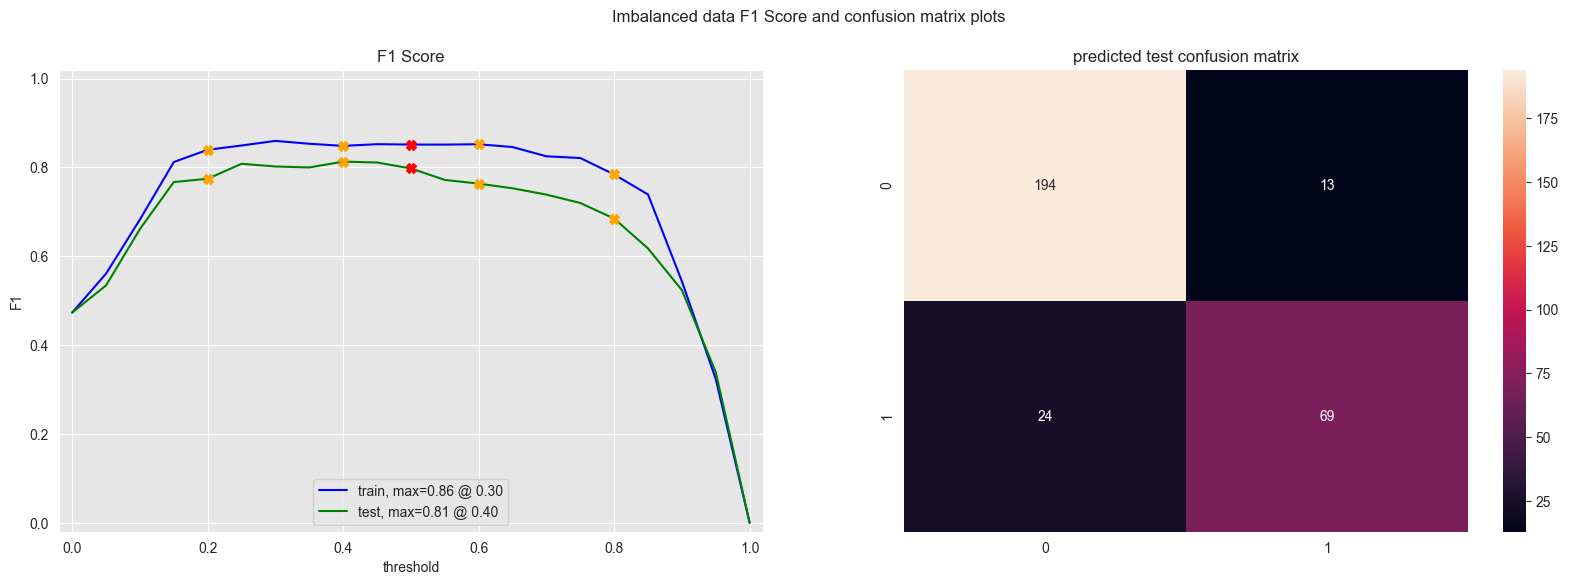

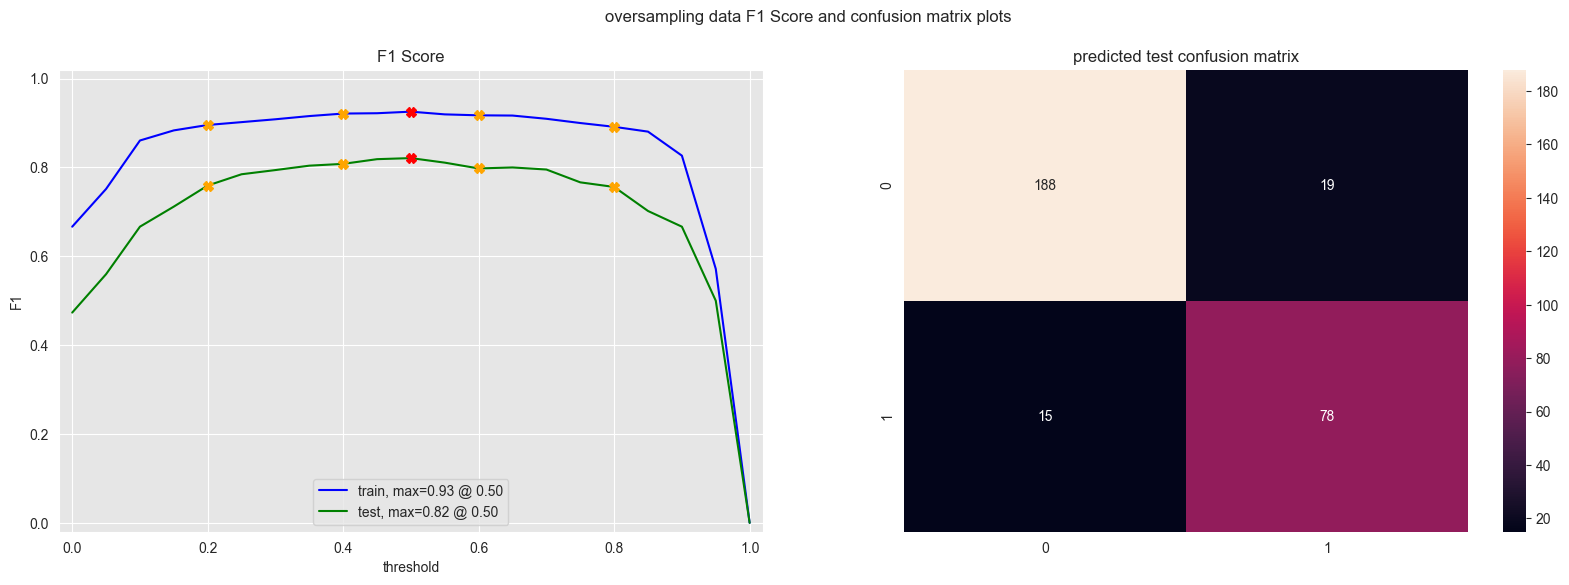

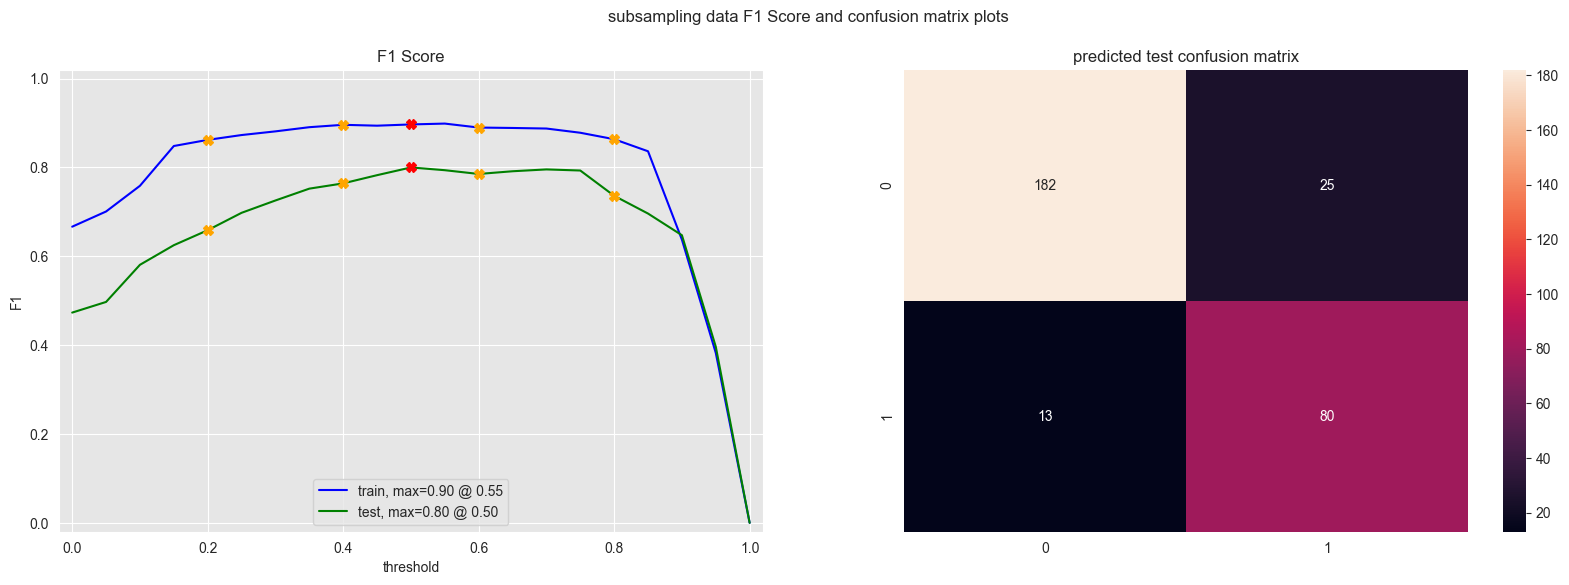

In [184]:
# Creation SVM model
svm_model = SVC(probability=True)

param_grid = {
    'kernel': ['linear', 'poly','rbf'],
    'degree': [2, 3, 4],
    'random_state': [42] 
}
svm_model=GridSearchCV(svm_model, param_grid=param_grid, cv=3, scoring='f1')

for i, sampling in enumerate(technique,0):
    svm_model.fit(data_technique[i*2], data_technique[(i*2)+1])
    bst_stm = svm_model.best_estimator_
    evaluate_model(bst_stm, data_technique[i*2], data_technique[(i*2)+1],f_sca_test, t_test, sampling )
    
bst_stm      

## Logistic Regresion Model

LogisticRegression(C=1, max_iter=10, random_state=42)

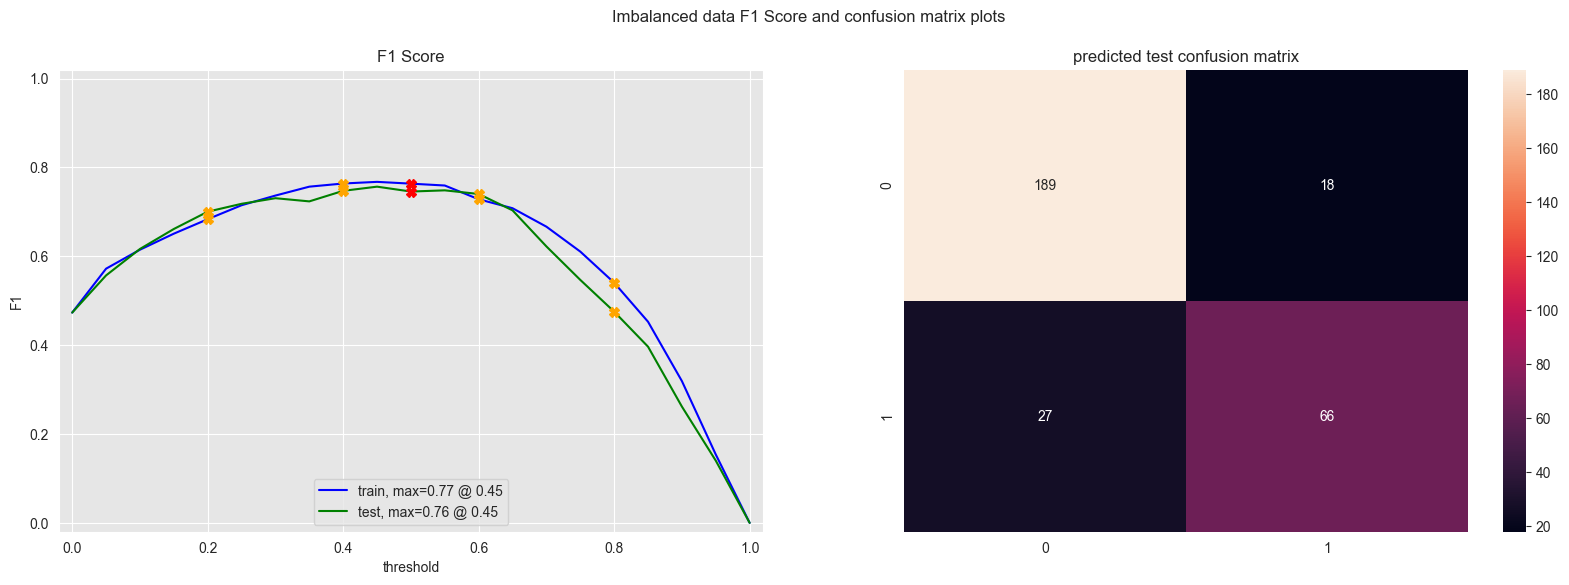

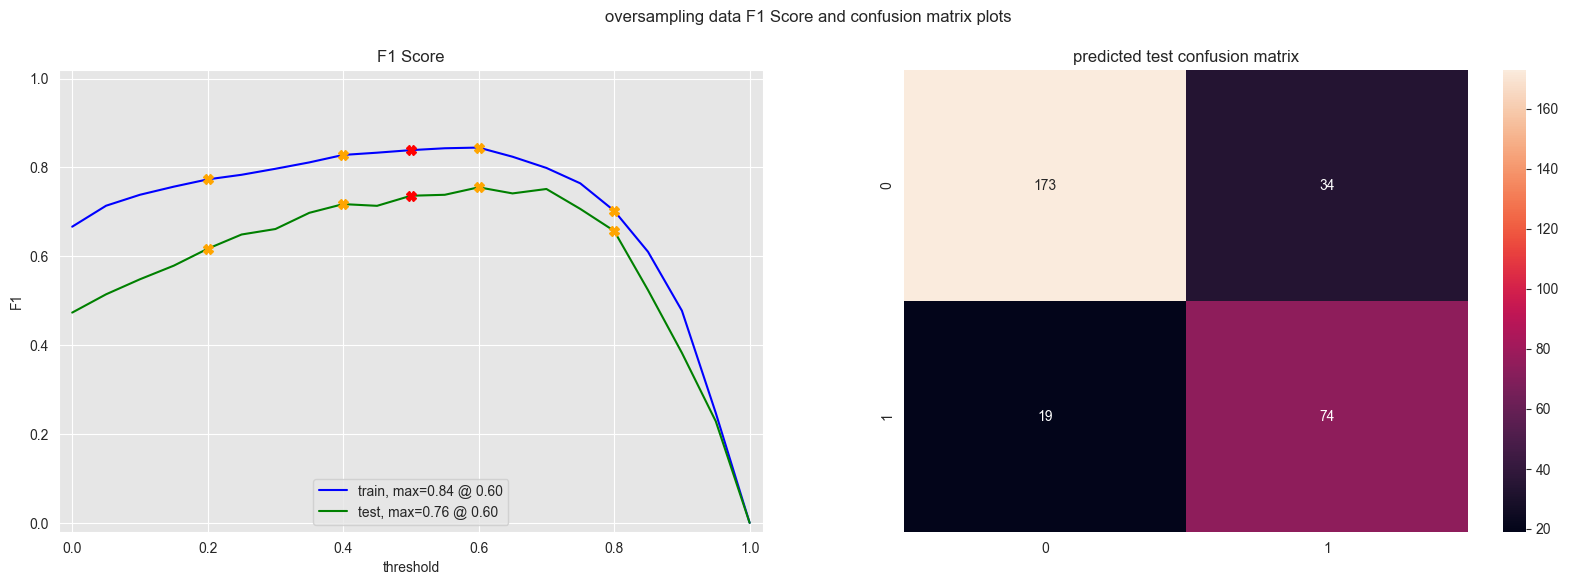

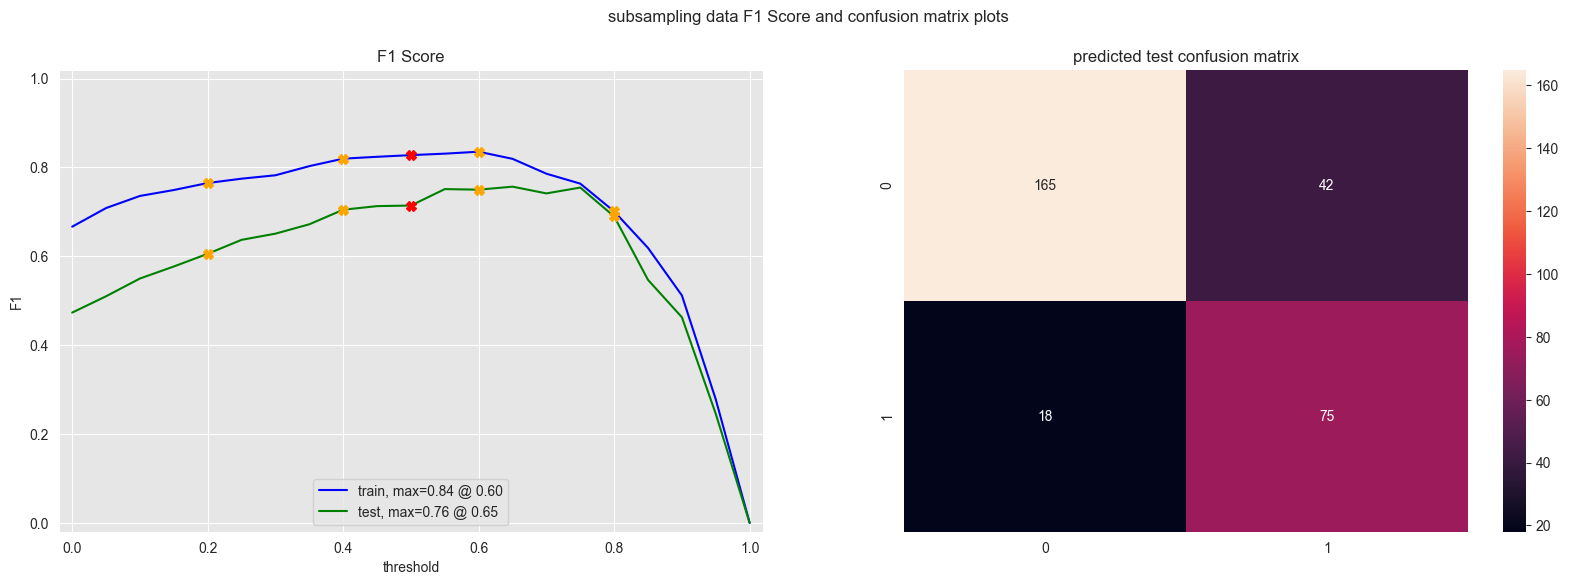

In [185]:
# Creation SVM model
lr_model = LogisticRegression()

param_grid = {
    'max_iter': [10,100],
    'C': [.1,1,10],
    'random_state': [42] 
}
lr_model=GridSearchCV(lr_model, param_grid=param_grid, cv=3, scoring='f1')

for i, sampling in enumerate(technique,0):
    lr_model.fit(data_technique[i*2], data_technique[(i*2)+1])
    bst_stm = lr_model.best_estimator_
    evaluate_model(bst_stm, data_technique[i*2], data_technique[(i*2)+1],f_sca_test, t_test, sampling )
    
bst_stm

## Random Forest

RandomForestClassifier(criterion='entropy', max_depth=5, max_samples=150,
                       n_jobs=-1, random_state=42)

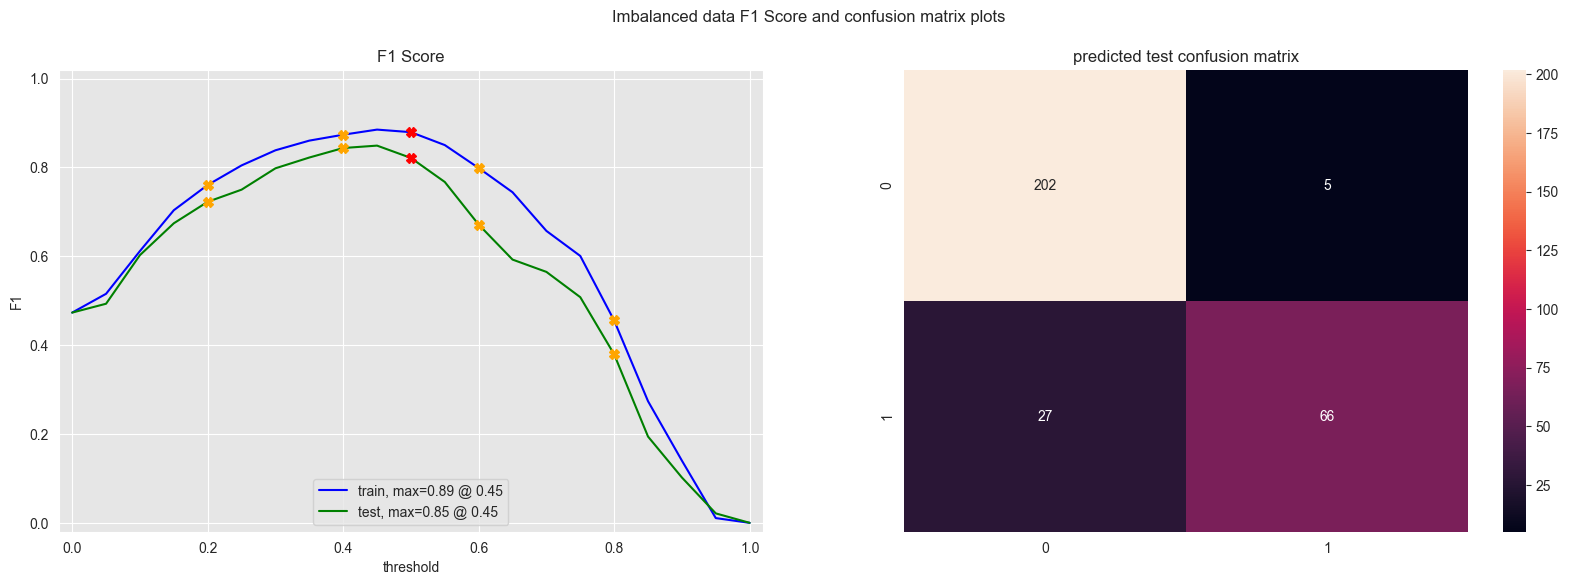

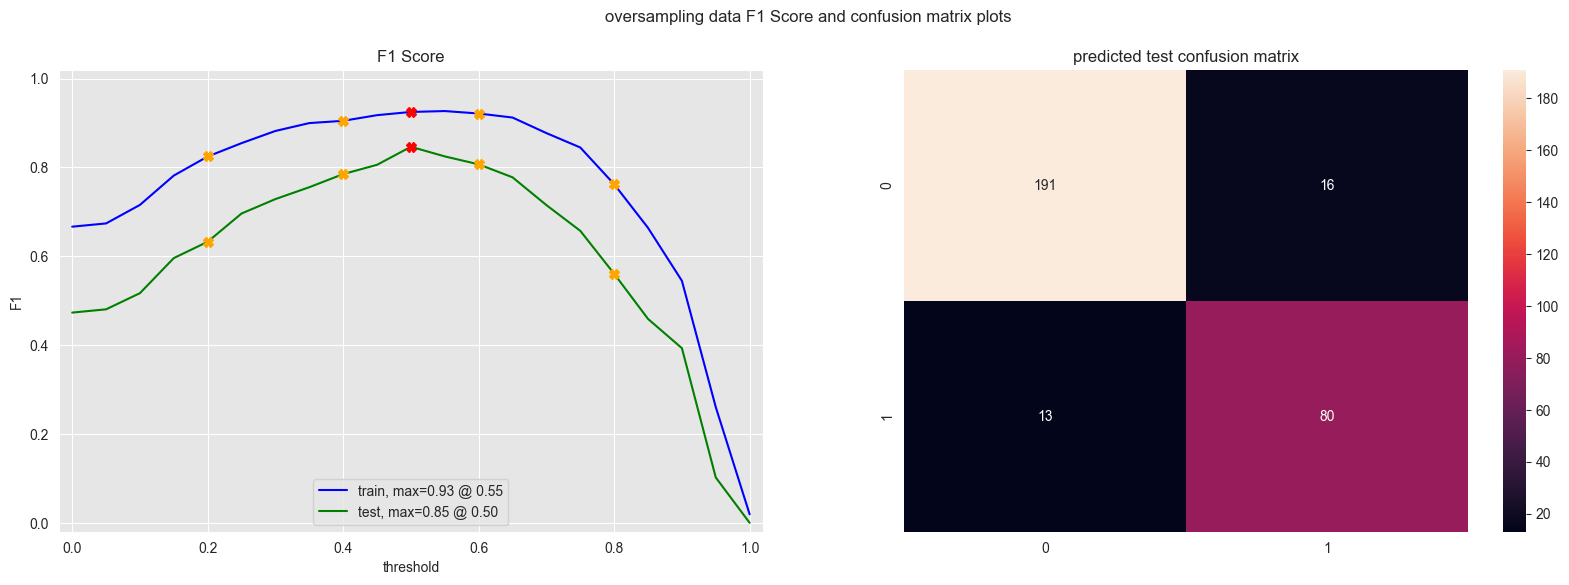

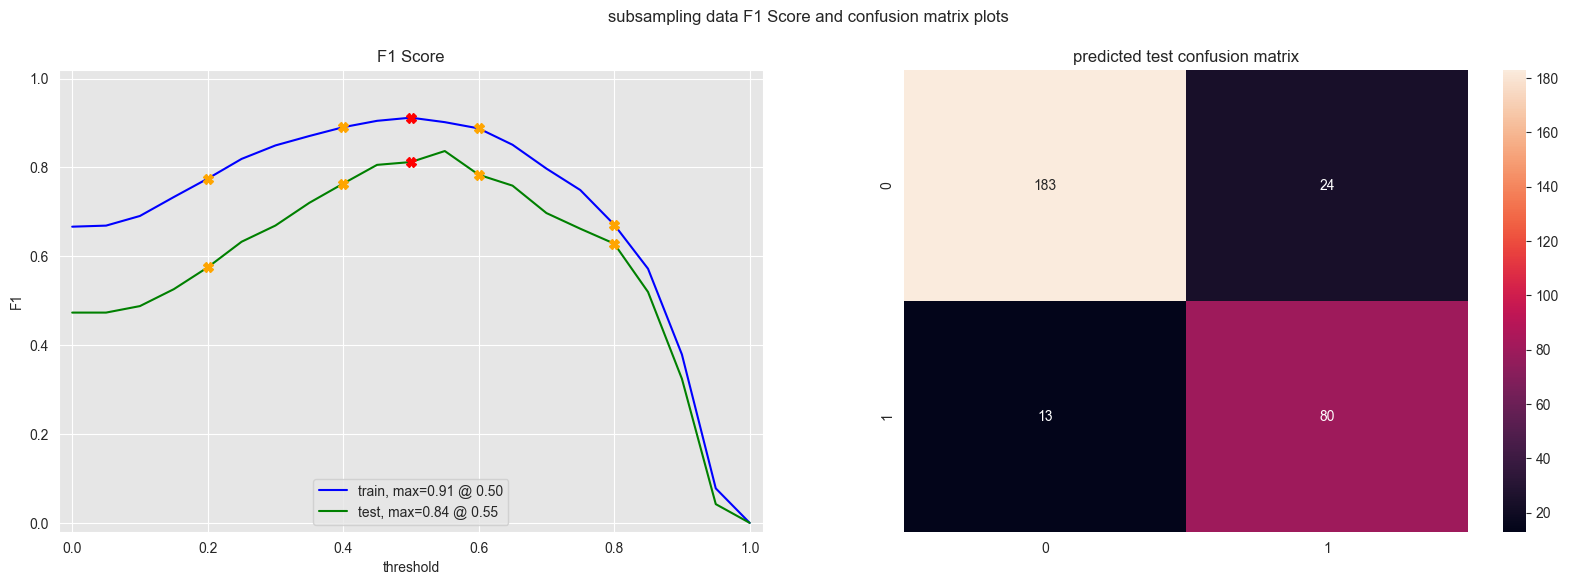

In [186]:
# Creation SVM model
rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [10,100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10],
    'n_jobs': [-1],
    'random_state': [42],
    'max_samples': [100,150]
}

rf_model=GridSearchCV(rf_model, param_grid=param_grid, cv=3, scoring='f1')

for i, sampling in enumerate(technique,0):
    rf_model.fit(data_technique[i*2], data_technique[(i*2)+1])
    bst_stm = rf_model.best_estimator_
    evaluate_model(bst_stm, data_technique[i*2], data_technique[(i*2)+1],f_sca_test, t_test, sampling )
    
bst_stm

# Conclution

I used three models with imbalanced, oversampling, and undersampling data, and evaluated them using the F1 score metric. As we can see, the linear model was the worst, and the SVM model is slightly better than the random forest. However, both the linear and random forest models have less overfitting when using the imbalanced data.

With these models, we can get an idea of whether a candidate is good or not.